In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Transformation of Variables

-It is required in all those algorithms where Gradient Descent---Global Minima and Euclidean Distance is used.

# Types of Transformation

1.Normalization and Standarization

2.Scaling to Minimum and Maximum Values

3.Scaling to Median and Quantiles

4.Guassian Transformaiton

    -Logarithmic Transformation

    -Reciprocal Transformation

    -Square Root Transformation

    -Exponential Transformation

    -Box Cox Transformation


# Standardizaiton
formula=(x-x_mean)/std

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()

In [21]:
scaler.fit(data.drop('Outcome',axis=1))

StandardScaler()

In [25]:
scaled_features=scaler.transform(data.drop('Outcome',axis=1))

In [26]:
scaled_data=pd.DataFrame(scaled_features,columns=data.columns[:-1])

In [28]:
scaled_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


## Train Test Split

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(scaled_data,data['Outcome'],test_size=0.20)

## Using KNN

We are trying to come up with a model to predict whether someone will have Diabetes or not. We'll start with k=1.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
predictions=knn.predict(x_test)

## Predictions and Evaluations

Let's evaluate our KNN model!

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [45]:
print(confusion_matrix(y_test,predictions))

[[89 20]
 [18 27]]


In [46]:
print(accuracy_score(y_test,predictions))

0.7532467532467533


In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.57      0.60      0.59        45

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154



# Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [49]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predic_i=knn.predict(x_test)
    error_rate.append(np.mean(predic_i!=y_test))

Text(0, 0.5, 'Error Rate')

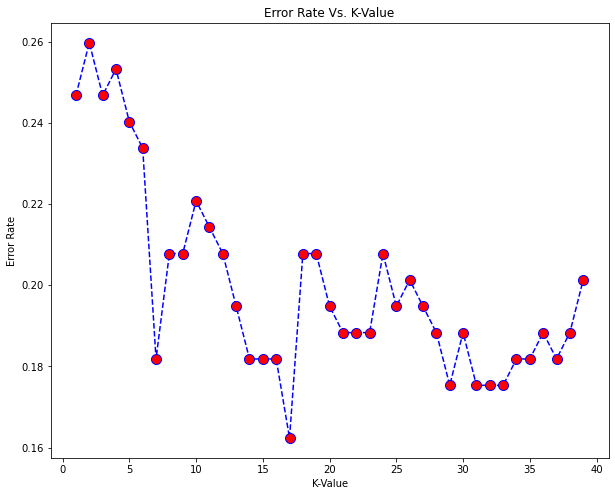

In [65]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate Vs. K-Value')
plt.xlabel("K-Value")
plt.ylabel("Error Rate")


Here we can see that that after arouns K>7 the error rate just tends to hover around 0.18-0.20 Let's retrain the model with that and check the classification report!

In [77]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn1.fit(x_train,y_train)
predictions1=knn.predict(x_test)

print("K=1 \n")
print(confusion_matrix(y_test,predictions1))
print('\n',classification_report(y_test,predictions1))

K=1 

[[89 20]
 [18 27]]

               precision    recall  f1-score   support

           0       0.83      0.82      0.82       109
           1       0.57      0.60      0.59        45

    accuracy                           0.75       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.76      0.75      0.75       154



In [92]:
# NOW WITH K=23
knn7 = KNeighborsClassifier(n_neighbors=7)

knn7.fit(x_train,y_train)
pred = knn7.predict(x_test)

print('K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

K=7


[[92 17]
 [11 34]]


              precision    recall  f1-score   support

           0       0.89      0.84      0.87       109
           1       0.67      0.76      0.71        45

    accuracy                           0.82       154
   macro avg       0.78      0.80      0.79       154
weighted avg       0.83      0.82      0.82       154



## Saving the model

In [90]:
import pickle

In [93]:
filename="trained_model.sav"
pickle.dump(knn7,open(filename,'wb'))

In [94]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [95]:
result = loaded_model.score(x_test, y_test)
print(result)

0.8181818181818182
